<a href="https://colab.research.google.com/github/blaocsheep/Polynomial-Regression/blob/main/FODS_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#Task 1

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=14GTYF60OdJzGK8IopRGqpx1ZPncrjCNX'
df = pd.read_csv(url)
print(df.head())
print(df.shape)


          X         Y
0  0.987988  5.098368
1  0.719720  2.516654
2 -0.403403  0.337961
3  0.107107  0.737320
4  0.345345 -0.780955
(1000, 2)


In [ ]:
df.describe()

,X,Y
count,1.000000e+03,1000.000000
mean,-4.440892e-18,0.954743
std,5.782171e-01,1.809135
min,-1.000000e+00,-5.091491
25%,-5.000000e-01,-0.106178
50%,5.009014e-17,0.912120
75%,5.000000e-01,1.967479
max,1.000000e+00,6.559203


In [ ]:
X = df['X']
Y = df['Y']
X_norm = (X - X.mean()) / X.std()
df_normalized = pd.DataFrame({'X': X_norm, 'Y': Y})

print(df_normalized.head())
df_normalized.describe()


          X         Y
0  1.708680  5.098368
1  1.244722  2.516654
2 -0.697668  0.337961
3  0.185237  0.737320
4  0.597259 -0.780955


,X,Y
count,1.000000e+03,1000.000000
mean,-1.421085e-17,0.954743
std,1.000000e+00,1.809135
min,-1.729454e+00,-5.091491
25%,-8.647271e-01,-0.106178
50%,9.389191e-17,0.912120
75%,8.647271e-01,1.967479
max,1.729454e+00,6.559203


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_norm, Y, test_size=0.2, random_state=42, shuffle=True)
print(X_train1.shape)
print(X_test1.shape)

(800,)
(200,)


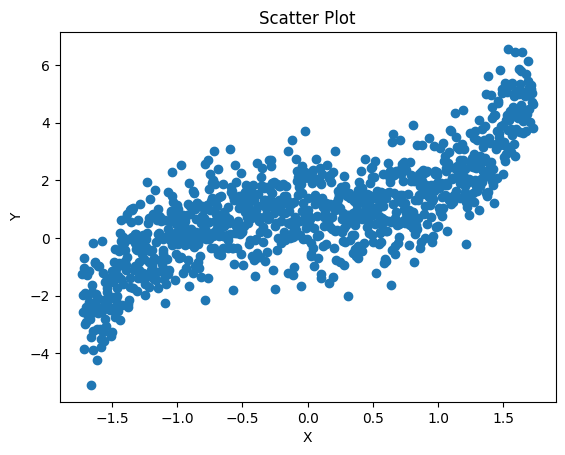

In [ ]:
plt.scatter(X_norm, Y)

plt.title("Scatter Plot")

plt.xlabel('X')
plt.ylabel('Y')

plt.show()



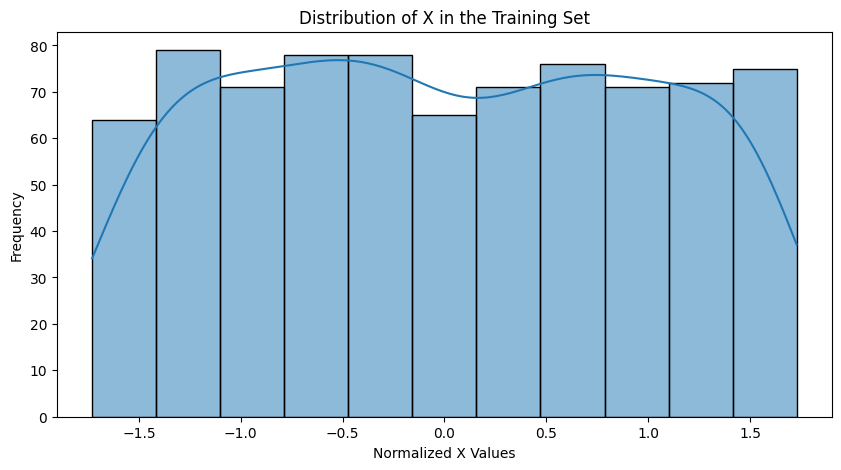

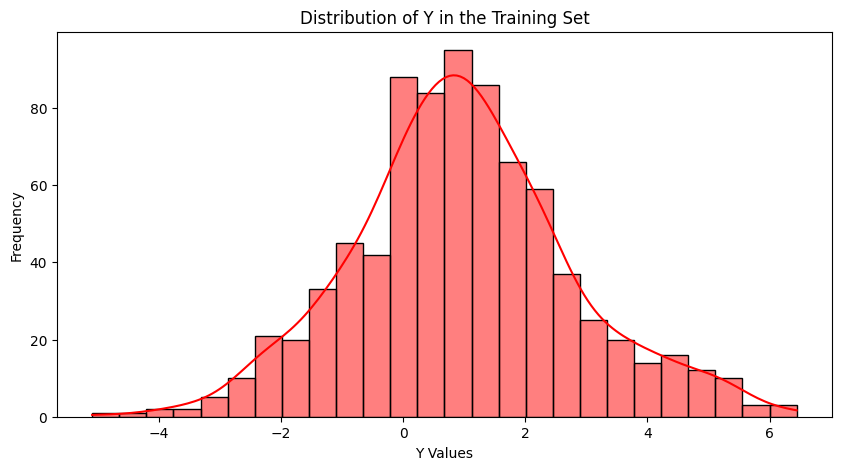

In [ ]:

plt.figure(figsize=(10, 5))

sns.histplot(X_train1, kde=True)
plt.title('Distribution of X in the Training Set')
plt.xlabel('Normalized X Values')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 5))

sns.histplot(y_train1, kde=True, color='r')
plt.title('Distribution of Y in the Training Set')
plt.xlabel('Y Values')
plt.ylabel('Frequency')
plt.show()

#Task 2

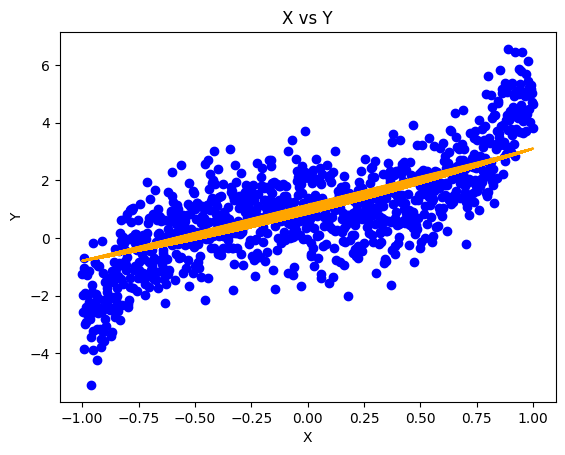

In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Univariate Polynomial Regression
class PolynomialRegression():

    def __init__(self, degree, learning_rate, iterations):
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Function to transform X
    def transform(self, X):
        # Initialize X_transform with a column of ones (bias term)
        X_transform = np.ones((X.shape[0], 1))  # Correctly size the X_transform based on input X

        # Loop through polynomial degrees
        for j in range(1, self.degree + 1):
            x_pow = np.power(X, j)
            X_transform = np.append(X_transform, x_pow.reshape(-1, 1), axis=1)

        return X_transform

    # Model training
    def fit(self, X, Y):
        # Convert pandas Series to numpy arrays
        X = X.to_numpy().reshape(-1, 1)
        Y = Y.to_numpy().reshape(-1, 1)

        self.m = X.shape[0]  # number of samples

        # Weight initialization
        self.W = np.zeros((self.degree + 1, 1))

        # Transform X for polynomial regression
        X_transform = self.transform(X)

        # Gradient descent learning
        for i in range(self.iterations):
            h = self.predict(X)
            error = h - Y

            # Update weights using gradient descent
            self.W = self.W - self.learning_rate * (1 / self.m) * np.dot(X_transform.T, error)

        return self

    # Predict
    def predict(self, X):
        # Convert to numpy if X is a pandas Series
        if isinstance(X, pd.Series):
            X = X.to_numpy().reshape(-1, 1)

        # Transform X for polynomial regression
        X_transform = self.transform(X)

        return np.dot(X_transform, self.W)

# Driver code
def main():
    # Create a sample dataset

    # Convert to pandas Series for compatibility with the PolynomialRegression class
    X = df['X']
    Y = df['Y']
    X = pd.Series(X)
    Y = pd.Series(Y)

    # Model training
    model1 = PolynomialRegression(degree=2, learning_rate=0.01, iterations=500)
    model1.fit(X, Y)

    # Prediction on training set
    Y_pred = model1.predict(X)

    # Visualization
    plt.scatter(X, Y, color='blue')
    plt.plot(X, Y_pred, color='orange')
    plt.title('X vs Y')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

if __name__ == "__main__":
    main()


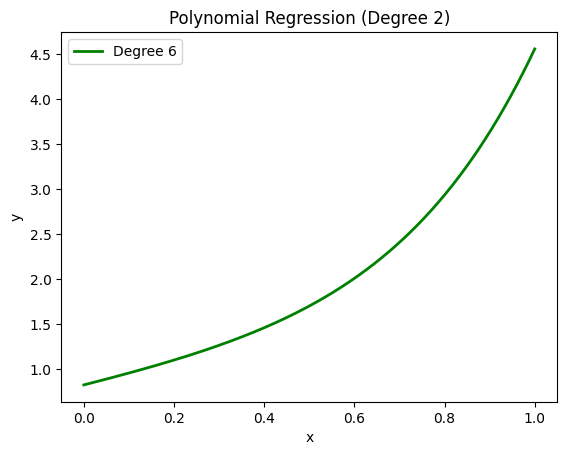

In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Univariate Polynomial Regression
class PolynomialRegression():

    def __init__(self, degree, learning_rate, iterations):
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Function to transform X
    def transform(self, X):
        # Initialize X_transform with a column of ones (bias term)
        X_transform = np.ones((X.shape[0], 1))  # Correctly size the X_transform based on input X

        # Loop through polynomial degrees
        for j in range(1, self.degree + 1):
            x_pow = np.power(X, j)
            X_transform = np.append(X_transform, x_pow.reshape(-1, 1), axis=1)

        return X_transform

    # Model training
    def fit(self, X, Y):
        # Convert pandas Series to numpy arrays
        X = X.to_numpy().reshape(-1, 1)
        Y = Y.to_numpy().reshape(-1, 1)

        self.m = X.shape[0]  # number of samples

        # Weight initialization
        self.W = np.zeros((self.degree + 1, 1))

        # Transform X for polynomial regression
        X_transform = self.transform(X)

        # Gradient descent learning
        for i in range(self.iterations):
            h = self.predict(X)
            error = h - Y

            # Update weights using gradient descent
            self.W = self.W - self.learning_rate * (1 / self.m) * np.dot(X_transform.T, error)

        return self

    # Predict
    def predict(self, X):
        # Convert to numpy if X is a pandas Series
        if isinstance(X, pd.Series):
            X = X.to_numpy().reshape(-1, 1)

        # Transform X for polynomial regression
        X_transform = self.transform(X)

        return np.dot(X_transform, self.W)

# Driver code
def main():
    # Sample dataset: using a sine function with noise, similar to the one in the image
    np.random.seed(0)

    # Replace this with your actual DataFrame df
    X = df['X']  # Assuming df is defined and contains columns 'X' and 'Y'
    Y = df['Y']

    # Convert to pandas Series for compatibility with the PolynomialRegression class
    X = pd.Series(X)
    Y = pd.Series(Y)

    # Define the degree of the polynomial to fit
    degree = 6  # Only degree 2

    # Generate fine grid of X values for smooth prediction lines
    X_plot = np.linspace(0, 1, 1000)
    X_plot_series = pd.Series(X_plot)

    # Fit the polynomial model
    model = PolynomialRegression(degree=degree, learning_rate=0.01, iterations=500)
    model.fit(X, Y)

    # Predict on the smooth grid of X values
    Y_plot = model.predict(X_plot_series)

    # Plot the original data points
   # plt.scatter(X, Y, color='blue', label='Data', zorder=5)

    # Plot the polynomial regression line in front of the data points
    plt.plot(X_plot, Y_plot, color='green', label=f'Degree {degree}', lw=2)

    # Set the plot labels and title
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Polynomial Regression (Degree 2)')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


#Task 2(rah)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import gdown

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=14GTYF60OdJzGK8IopRGqpx1ZPncrjCNX'
gdown.download(url, 'file.csv', quiet=False)
df = pd.read_csv('file.csv')

Downloading...
From: https://drive.google.com/uc?export=download&id=14GTYF60OdJzGK8IopRGqpx1ZPncrjCNX
To: /content/file.csv
100%|██████████| 38.9k/38.9k [00:00<00:00, 21.8MB/s]


In [ ]:
X = df['X']
Y = df['Y']
X_norm = (X - X.mean()) / X.std()
df_normalized = pd.DataFrame({'X': X_norm, 'Y': Y})

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_norm, Y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
df_train = pd.DataFrame({'X': X_train1, 'Y': y_train1})
df_sorted = df_train.sort_values(by='X')

In [ ]:
df_test = pd.DataFrame({'X': X_test1, 'Y': y_test1})
df_sortedTest = df_test.sort_values(by='X')

In [ ]:
def polygen(degree):
    #the polynomial assumed is 0.01x**n + 0.01x**(n-1) + ..... + 0.01*x + 0.01
    coefficients = []
    for i in range(degree+1):
        coefficients.append(0.0000000001)
    polynomial = np.poly1d(coefficients)
    return polynomial

In [ ]:
def errorf(j,y):
    t = df_sorted.iat[j,1]
    return (y - t)**2

In [ ]:
def mse(poly):
    errorsum = 0
    for i in range(1,800):
        errorsum += (df_sorted.iat[i,1] - np.polyval(poly,df_sorted.iat[i,0]))**2
    return errorsum/800

In [ ]:
def gradientdescent(w,eta):
    length = len(w)
    preverr =  mse(w)
    repeat = True
    count = 0
    while repeat:
        count+=1
        oldpoly = w
        for j in range (1,799):
            t = np.polyval(w,df_sorted.iat[j,0])
            for i in range (length+1):
                if i==0:
                    w[i] = w[i] - eta*2*(np.polyval(w,df_sorted.iat[j,0]) - df_sorted.iat[j,1])#gradient descent after taylor series approximation
                else:
                    w[i] = w[i] - eta*2*i*df_sorted.iat[j,0]**i*(t - df_sorted.iat[j,1])#gradient descent after taylor series approximation
        error = mse(w)
        if(error>preverr or count == 500):
            repeat = False
            w = oldpoly
            print(f"error of polynomial after gradient descent is {error} and the number of BGD iterations performed were {count}")
    return w

In [ ]:
for i in range(1,10):
    polynomial = polygen(i)
    print(polynomial)
    errorsum = mse(polynomial)
    print(f"error of polynomial before gradient descent is {errorsum}")
    polynomial = gradientdescent(polynomial, 0.00001)
    print(polynomial)
    plothelper = np.linspace(-3, 3, 100)
    plothelpee = polynomial(plothelper)
    plt.scatter(X_train1, y_train1)
    plt.xlabel(f'X- degree {i}')
    plt.ylabel('Y')
    plt.xlim(-3, 3)
    plt.ylim(-6, 6)
    plt.plot(plothelper,plothelpee,'r')
plt.show()

NameError: name 'polygen' is not defined

 
1e-10 x + 1e-10
error of polynomial before gradient descent is 4.171185899632877
error of polynomial after gradient descent is 1.3717971109534406 and the number of BGD iterations performed were 500
 
1.37 x + 0.9601


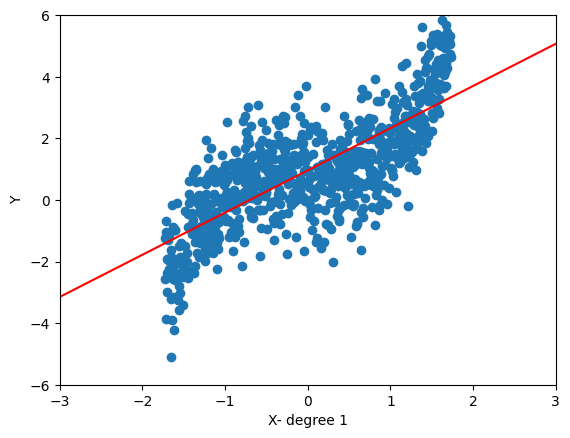

In [ ]:
i=1
polynomial = polygen(i)
print(polynomial)
errorsum = mse(polynomial)
print(f"error of polynomial before gradient descent is {errorsum}")
polynomial = gradientdescent(polynomial, 0.00001)
print(polynomial)
plothelper = np.linspace(-3, 3, 100)
plothelpee = polynomial(plothelper)
plt.scatter(X_train1, y_train1)
plt.xlabel(f'X- degree {i}')
plt.ylabel('Y')
plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.plot(plothelper,plothelpee,'r')
plt.show()

       2
1e-10 x + 1e-10 x + 1e-10
error of polynomial before gradient descent is 4.171185899409082
error of polynomial after gradient descent is 1.3536263749368516 and the number of BGD iterations performed were 500
        2
0.1782 x + 1.364 x + 0.7775


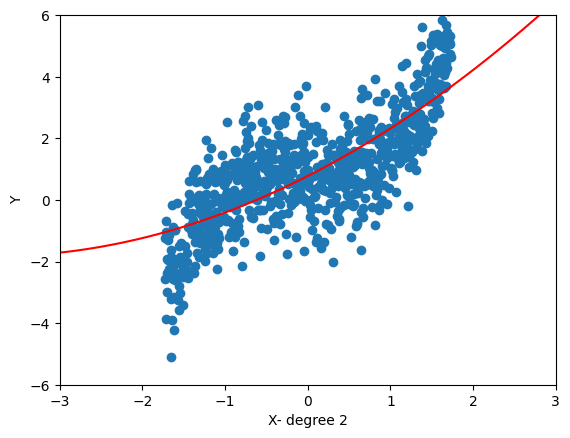

In [ ]:
i=2
polynomial = polygen(i)
print(polynomial)
errorsum = mse(polynomial)
print(f"error of polynomial before gradient descent is {errorsum}")
polynomial = gradientdescent(polynomial, 0.00001)
print(polynomial)
plothelper = np.linspace(-3, 3, 100)
plothelpee = polynomial(plothelper)
plt.scatter(X_train1, y_train1)
plt.xlabel(f'X- degree {i}')
plt.ylabel('Y')
plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.plot(plothelper,plothelpee,'r')
plt.show()

In [ ]:
i=3
polynomial = polygen(i)
print(polynomial)
errorsum = mse(polynomial)
print(f"error of polynomial before gradient descent is {errorsum}")
polynomial = gradientdescent(polynomial, 0.00001)
print(polynomial)
plothelper = np.linspace(-3, 3, 100)
plothelpee = polynomial(plothelper)
plt.scatter(X_train1, y_train1)
plt.xlabel(f'X- degree {i}')
plt.ylabel('Y')
plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.plot(plothelper,plothelpee,'r')
plt.show()

NameError: name 'polygen' is not defined

       4         3         2
1e-10 x + 1e-10 x + 1e-10 x + 1e-10 x + 1e-10
error of polynomial before gradient descent is 4.171185898394026
error of polynomial after gradient descent is 0.9782440012838866 and the number of BGD iterations performed were 500
          4          3          2
-0.05555 x + 0.7723 x + 0.3055 x + 0.008037 x + 0.7302


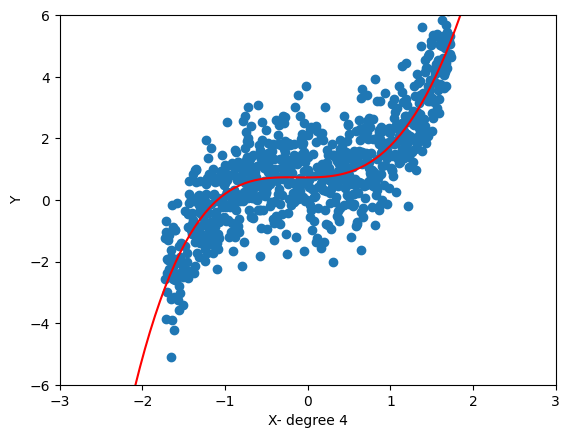

In [ ]:
i=4
polynomial = polygen(i)
print(polynomial)
errorsum = mse(polynomial)
print(f"error of polynomial before gradient descent is {errorsum}")
polynomial = gradientdescent(polynomial, 0.00001)
print(polynomial)
plothelper = np.linspace(-3, 3, 100)
plothelpee = polynomial(plothelper)
plt.scatter(X_train1, y_train1)
plt.xlabel(f'X- degree {i}')
plt.ylabel('Y')
plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.plot(plothelper,plothelpee,'r')
plt.show()

       5         4         3         2
1e-10 x + 1e-10 x + 1e-10 x + 1e-10 x + 1e-10 x + 1e-10
error of polynomial before gradient descent is 4.171185897032285
error of polynomial after gradient descent is 0.9815405888594441 and the number of BGD iterations performed were 500
         5           4          3          2
0.05897 x - 0.06469 x + 0.5815 x + 0.3164 x + 0.135 x + 0.7315


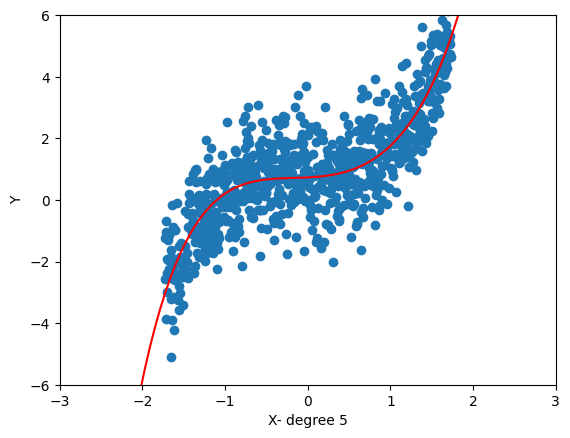

In [ ]:
i=5
polynomial = polygen(i)
print(polynomial)
errorsum = mse(polynomial)
print(f"error of polynomial before gradient descent is {errorsum}")
polynomial = gradientdescent(polynomial, 0.00001)
print(polynomial)
plothelper = np.linspace(-3, 3, 100)
plothelpee = polynomial(plothelper)
plt.scatter(X_train1, y_train1)
plt.xlabel(f'X- degree {i}')
plt.ylabel('Y')
plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.plot(plothelper,plothelpee,'r')
plt.show()

       6         5         4         3         2
1e-10 x + 1e-10 x + 1e-10 x + 1e-10 x + 1e-10 x + 1e-10 x + 1e-10
error of polynomial before gradient descent is 4.171185896071702
error of polynomial after gradient descent is 0.982189421747713 and the number of BGD iterations performed were 500
           6           5           4          3          2
0.0003069 x + 0.07286 x - 0.05288 x + 0.5497 x + 0.2585 x + 0.1378 x + 0.7524


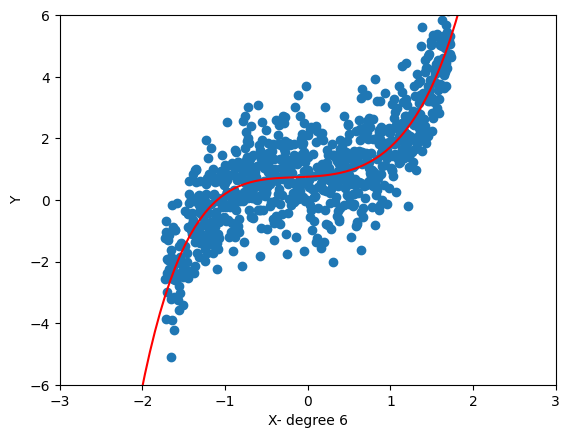

In [ ]:
i=6
polynomial = polygen(i)
print(polynomial)
errorsum = mse(polynomial)
print(f"error of polynomial before gradient descent is {errorsum}")
polynomial = gradientdescent(polynomial, 0.00001)
print(polynomial)
plothelper = np.linspace(-3, 3, 100)
plothelpee = polynomial(plothelper)
plt.scatter(X_train1, y_train1)
plt.xlabel(f'X- degree {i}')
plt.ylabel('Y')
plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.plot(plothelper,plothelpee,'r')
plt.show()

       7         6         5         4         3         2
1e-10 x + 1e-10 x + 1e-10 x + 1e-10 x + 1e-10 x + 1e-10 x + 1e-10 x + 1e-10
error of polynomial before gradient descent is 4.171185892739284
error of polynomial after gradient descent is 0.9796964775285332 and the number of BGD iterations performed were 500
          7           6          5            4          3          2
-0.06278 x - 0.01243 x + 0.3148 x + 0.001627 x + 0.3531 x + 0.2371 x + 0.1121 x + 0.7414


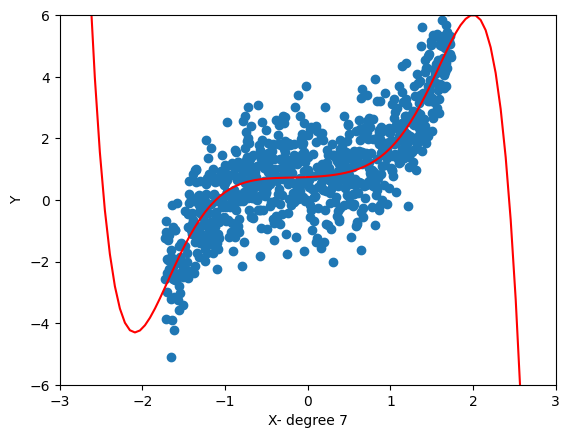

In [ ]:
i=7
polynomial = polygen(i)
print(polynomial)
errorsum = mse(polynomial)
print(f"error of polynomial before gradient descent is {errorsum}")
polynomial = gradientdescent(polynomial, 0.00001)
print(polynomial)
plothelper = np.linspace(-3, 3, 100)
plothelpee = polynomial(plothelper)
plt.scatter(X_train1, y_train1)
plt.xlabel(f'X- degree {i}')
plt.ylabel('Y')
plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.plot(plothelper,plothelpee,'r')
plt.show()

       8         7         6         5         4         3         2
1e-10 x + 1e-10 x + 1e-10 x + 1e-10 x + 1e-10 x + 1e-10 x + 1e-10 x + 1e-10 x + 1e-10
error of polynomial before gradient descent is 4.171185890432541
error of polynomial after gradient descent is 0.9843614332704181 and the number of BGD iterations performed were 500
        8          7          6          5         4         3
0.0244 x - 0.0751 x - 0.1287 x + 0.3494 x + 0.133 x + 0.328 x
           2
 + 0.2954 x + 0.1099 x + 0.6537


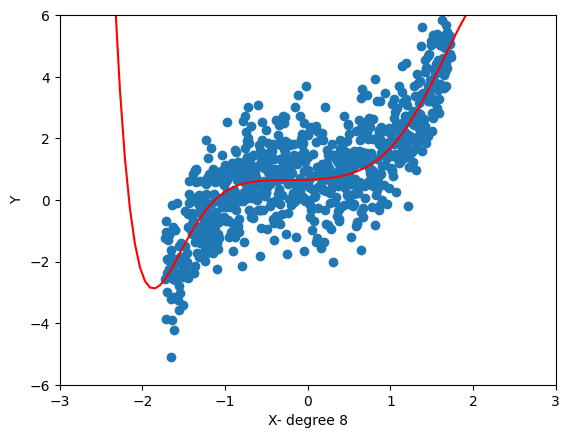

In [ ]:
i=8
polynomial = polygen(i)
print(polynomial)
errorsum = mse(polynomial)
print(f"error of polynomial before gradient descent is {errorsum}")
polynomial = gradientdescent(polynomial, 0.000005)
print(polynomial)
plothelper = np.linspace(-3, 3, 100)
plothelpee = polynomial(plothelper)
plt.scatter(X_train1, y_train1)
plt.xlabel(f'X- degree {i}')
plt.ylabel('Y')
plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.plot(plothelper,plothelpee,'r')
plt.show()

       9         8         7         6         5         4         3
1e-10 x + 1e-10 x + 1e-10 x + 1e-10 x + 1e-10 x + 1e-10 x + 1e-10 x
          2
 + 1e-10 x + 1e-10 x + 1e-10
error of polynomial before gradient descent is 4.171185882006963
error of polynomial after gradient descent is 1.0488933695615508 and the number of BGD iterations performed were 500
          9           8           7          6         5          4
0.007241 x + 0.06314 x - 0.06233 x - 0.1865 x + 0.277 x + 0.0995 x
           3          2
 + 0.3385 x + 0.2952 x + 0.1318 x + 0.6635


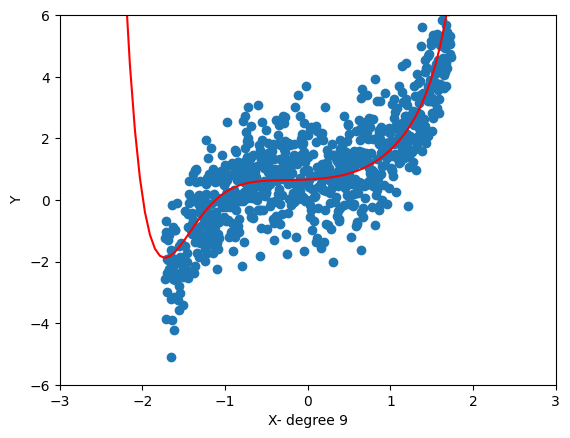

In [ ]:
i=9
polynomial = polygen(i)
print(polynomial)
errorsum = mse(polynomial)
print(f"error of polynomial before gradient descent is {errorsum}")
polynomial = gradientdescent(polynomial, 0.000005)
print(polynomial)
plothelper = np.linspace(-3, 3, 100)
plothelpee = polynomial(plothelper)
plt.scatter(X_train1, y_train1)
plt.xlabel(f'X- degree {i}')
plt.ylabel('Y')
plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.plot(plothelper,plothelpee,'r')
plt.show()

#Ridge Regression

In [ ]:
def mseTest(poly):
    errorsum = 0
    for i in range(0, 200):
        errorsum += (df_sortedTest.iat[i,1] - np.polyval(poly,df_sortedTest.iat[i,0]))**2
    return errorsum/200

In [ ]:
def mse(poly):
    errorsum = 0
    for i in range(0, 800):
        errorsum += (df_sorted.iat[i,1] - np.polyval(poly,df_sorted.iat[i,0]))**2
    return errorsum/800

In [ ]:
def polygen(degree):
    #the polynomial assumed is 0.01x**n + 0.01x**(n-1) + ..... + 0.01*x + 0.01
    coefficients = []
    for i in range(degree+1):
        coefficients.append(0.0000000001)
    polynomial = np.poly1d(coefficients)
    return polynomial

In [ ]:
def gradientdescentRidge(w,eta, lam, X):
    length = len(w)
    preverr =  mse(w)
    repeat = True
    count = 0
    while repeat:
        count+=1
        oldpoly = w
        for j in range (len(X)):
            t = np.polyval(w,df_sorted.iat[j,0])
            for i in range (length+1):
                if i==0:
                    w[i] = w[i] - eta*2*(np.polyval(w,df_sorted.iat[j,0]) - df_sorted.iat[j,1])#gradient descent after taylor series approximation
                else:
                    w[i] = w[i] - eta*(2*df_sorted.iat[j,0]**i*(t - df_sorted.iat[j,1])+2*w[i]*lam) #gradient descent after taylor series approximation
        error = mse(w)
        if(error>preverr or count == 500):
            repeat = False
            if(error>preverr):
              w = oldpoly
            print(f"error of polynomial after gradient descent is {error} and the number of BGD iterations performed were {count}")
    return w


In [ ]:
# Adjust lambda range to cover a wider range of regularization strengths
lams = [0,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Make sure you're using appropriate eta and polynomial degree.
eta = 0.0001  # You can try adjusting this slightly up or down.

bias = []
test_error = []
variance = []
i = 3  # Polynomial degree, can be tweaked for different complexity levels

# Generate the polynomial initially


# Perform gradient descent for each lambda value
for lam in lams:
    polynomial = gradientdescentRidge(polynomial, eta, lam, X_train1)

    # Calculate training error (bias) and test error
    errorsum1 = mse(polynomial)
    bias.append(errorsum1)  # Bias or training error

    errorsum2 = mseTest(polynomial)
    test_error.append(errorsum2)  # Test error

    # Variance could be recalculated differently, but here it's kept as is
    variance.append(errorsum1 - errorsum2)


NameError: name 'polygen' is not defined

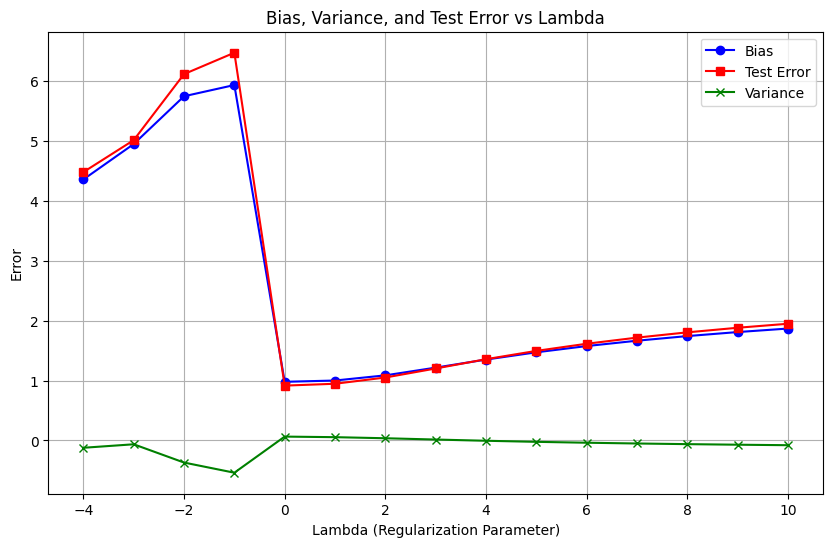

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have bias, test_error, variance, and lams already calculated
# If not, make sure to calculate them using your existing code.

# Plot Bias, Variance, and Test Error against lambda
plt.figure(figsize=(10, 6))

# Plot Bias
plt.plot(lams, bias, label='Bias', color='blue', marker='o')

# Plot Test Error
plt.plot(lams, test_error, label='Test Error', color='red', marker='s')

# Plot Variance
plt.plot(lams, variance, label='Variance', color='green', marker='x')

# Adding titles and labels
plt.title('Bias, Variance, and Test Error vs Lambda')
plt.xlabel('Lambda (Regularization Parameter)')
plt.ylabel('Error')

# Add a legend to explain the lines
plt.legend()

# Show the plot
plt.grid(True)
plt.show()



SyntaxError: invalid syntax (<ipython-input-15-4aba285df703>, line 2)